In [270]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat 
from matplotlib.pyplot import imread

In [271]:
mat = loadmat("ex7data2.mat")
X = mat["X"]

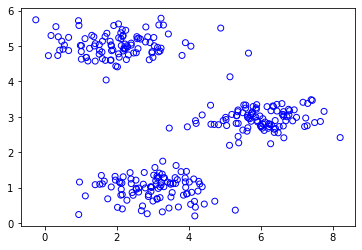

In [275]:
plt.scatter(X[:,0], X[:,1], marker = "o" , facecolors="none", edgecolors = "blue")

In [276]:
def closest_centroid(X, centroid):

    temp = []
    idx = np.zeros((X.shape[0], 1)) 
    temp = np.zeros((centroid.shape[0]))

    for i in range(X.shape[0]):
        for j in range(centroid.shape[0]):
            distance = X[i,:] - centroid[j,:]
            length = np.sum(distance**2)
            temp[j] = length
        idx[i] = np.argmin(temp) + 1 #as idx starts from 1 -> n (added 1 to maintain accuracy with pdf values)
    return idx

In [277]:
K = 3
initial_centroids = np.array([[3,3],[6,2],[8,5]])
idx = closest_centroid(X, initial_centroids)
print("Closest centroids for the first 3 examples:\n", idx[0:3])

Closest centroids for the first 3 examples:
 [[1.]
 [3.]
 [2.]]


In [278]:
def centroid_mean(X, idx, K):

    m, n = X.shape 
    centroids = np.zeros((K, n))
    Ck = np.zeros((K,1))

    for i in range(m):

        index = int((idx[i] - 1))

        centroids[index,:] = centroids[index,:] + X[i,:]
        Ck[index] = Ck[index] + 1 #no. of examples around centroid k

    return centroids/Ck

In [279]:
centroids = centroid_mean(X, idx, K)
print("Centroids computed after initial finding of closest centroids:\n", centroids)

Centroids computed after initial finding of closest centroids:
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [280]:
def k_means_plot(X, idx, K, centroid, iters):
    
    color = "rgb"
    plt.figure(figsize=(15,10))

    centroid_history = np.zeros([iters, centroid.shape[0], centroid.shape[1]])

    for i in range(iters):
        centroid_history[i] = centroid
        centroid = centroid_mean(X, idx, K)
        idx = closest_centroid(X, centroid)
    
    for k in range(1, K+1):
        grp = (idx == k).reshape(X.shape[0],1)
        plt.scatter(X[grp[:,0],0],X[grp[:,0],1], marker = 'o', facecolors = 'None', edgecolors = color[k-1])

    plt.plot(centroid_history[:, :, 0], centroid_history[:, :, 1], 'X-', c = 'k', markersize = 8, linewidth = 0.8)

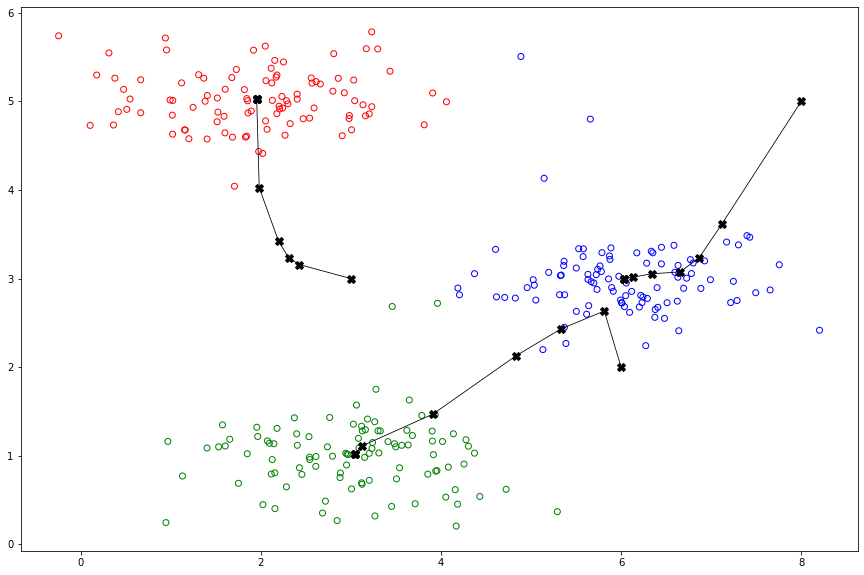

In [281]:
k_means_plot(X, idx, K, initial_centroids, 10)

## Random Initialization

In [282]:
def random_init(X, K):

    m, n = X.shape
    centroid = np.zeros((K,n))

    for i in range(K):
        centroid[i] = X[np.random.randint(0, m+1),:]
    
    return centroid

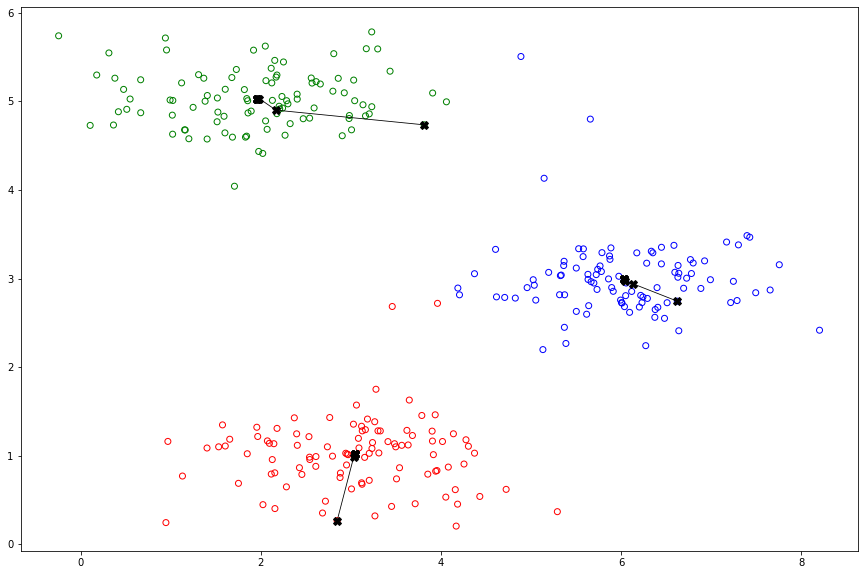

In [284]:
centroids = random_init(X, K)
idx = closest_centroid(X, centroids)
k_means_plot(X,idx, K, centroids, 10)

## Image Compression

In [285]:
img = imread('bird_small.png')
A = img

X2 = (A).reshape(128*128,3) #preprocessing so that all values are in range 0-1

In [286]:
def k_means(X, initial_centroids, iters, K):

    idx = closest_centroid(X, initial_centroids)

    for i in range (iters):

        centroid = centroid_mean(X, idx, K)

        idx = closest_centroid(X, centroid)

    return centroid, idx

In [287]:
K2 = 16
num_iters = 10
initial_centroids2 = random_init(X2, K2)
centroids2, idx2 = k_means(X2, initial_centroids2, num_iters,K2)

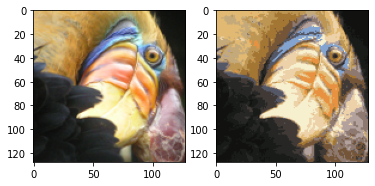

In [288]:
X2_recovered = X2.copy()

for i in range(1, K2+1):
    X2_recovered[(idx2 == i).flatten(),:] = centroids2[i-1]

X2_recovered = X2_recovered.reshape(128,128,3)

import matplotlib.image as mpimg

fig, ax = plt.subplots(1,2)
ax[0].imshow(X2.reshape(128,128,3))
ax[1].imshow(X2_recovered)

# Principal Component Analysis 

In [289]:
mat3 = loadmat("ex7data1.mat")
X3 = mat3["X"]

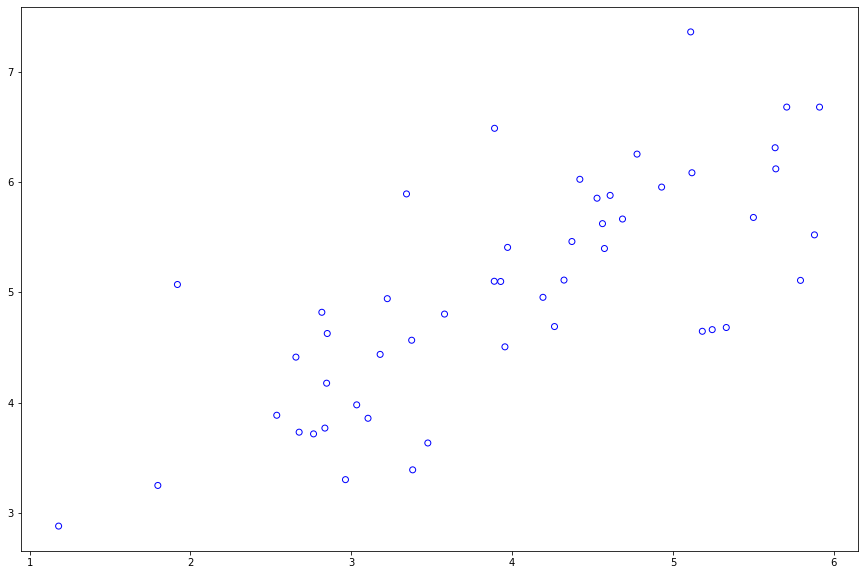

In [311]:
plt.figure(figsize=(15,10))
plt.scatter(X3[:,0],X3[:,1],marker="o",facecolors="none",edgecolors="b")

In [291]:
from numpy.linalg import svd

In [292]:
def feature_normalization(X):

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    X = (X - np.mean(X, axis = 0))/np.std(X, axis = 0)
    
    return X, mu, sigma

In [293]:
def PCA(X):
    m, n = X.shape

    sigma = 1/m * np.dot(X.T, X)

    U, S, V = np.linalg.svd(sigma) #svd = singular value decomposition

    return U, S, V

In [294]:
X_norm, mu = feature_normalization(X3)[:2]
U, S = PCA(X_norm)[:2]

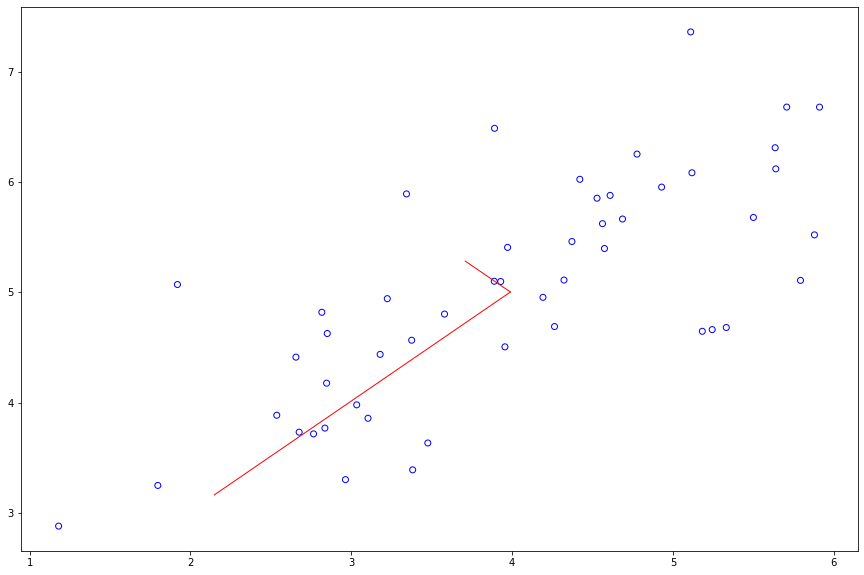

In [295]:
plt.figure(figsize=(15,10))
plt.scatter(X3[:,0],X3[:,1],marker="o",facecolors="none",edgecolors="b")
plt.plot([mu[0],(mu+1.5*S[0]*U[:,0].T)[0]],[mu[1],(mu+1.5*S[0]*U[:,0].T)[1]],color="red",linewidth=1)
plt.plot([mu[0],(mu+1.5*S[1]*U[:,1].T)[0]],[mu[1],(mu+1.5*S[1]*U[:,1].T)[1]],color="red",linewidth=1)

plt.show()

In [296]:
print("Top eigenvector U(:,1) =:",U[:,0])

Top eigenvector U(:,1) =: [-0.70710678 -0.70710678]


# Dimensionality Reduction

In [297]:
def project_data(X, U, K):
    #projecting the vector on the principal component (eigen vector)
    #projection of normalized X onto reduced dimensional space by first K columns

    U_reduce = U[:, 0:K]
    
    Z = np.dot(X, U_reduce)

    return Z

In [298]:
K=1
Z = project_data(X_norm, U, K)
print("Projection of the first example:",Z[0][0])

Projection of the first example: 1.4963126084578515


# Reconstructing Data

In [299]:
def reconstruct_data(Z, U, K):

    U_reduced = U[:, 0:K]

    X_R = np.dot(Z, U_reduced.T)

    return X_R

In [300]:
X_rec  = reconstruct_data(Z, U, K)
print("Approximation of the first example:",X_rec[0,:])

Approximation of the first example: [-1.05805279 -1.05805279]


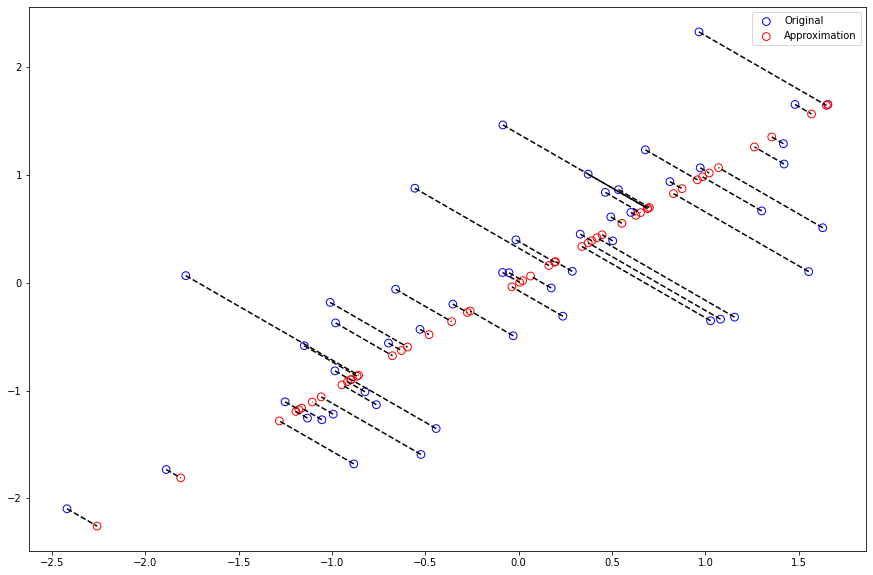

In [301]:
plt.figure(figsize=(15,10))
plt.scatter(X_norm[:,0],X_norm[:,1],marker="o",label="Original",facecolors="none",edgecolors="b",s=60)
plt.scatter(X_rec[:,0],X_rec[:,1],marker="o",label="Approximation",facecolors="none",edgecolors="r",s=60)

for i in range(X_norm.shape[0]):
    line_vec = np.vstack([X_norm[i], X_rec[i]])
    plt.plot(line_vec[:, 0], line_vec[:, 1], 'k--')

plt.legend()
plt.show()

# Face Image Dataset

In [302]:
mat4 = loadmat("ex7faces.mat")
X4 = mat4["X"] #(5000, 1024)

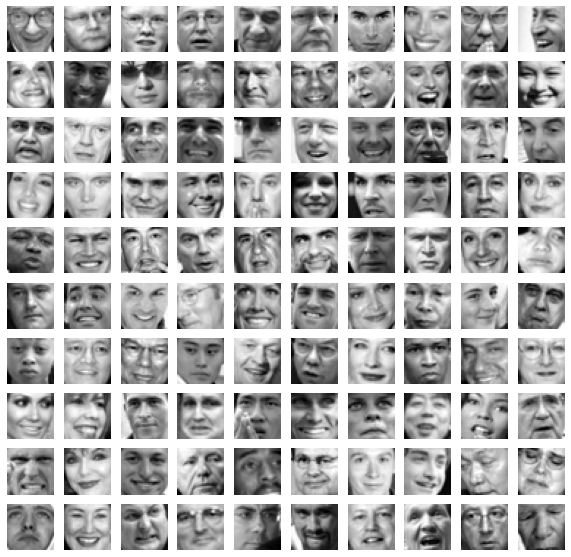

In [303]:
fig, ax = plt.subplots(10, 10, figsize = (10, 10))

for i in range(0, 100, 10):
    for j in range(10):
        ax[int(i/10),j].imshow(X4[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax[int(i/10),j].axis("off")


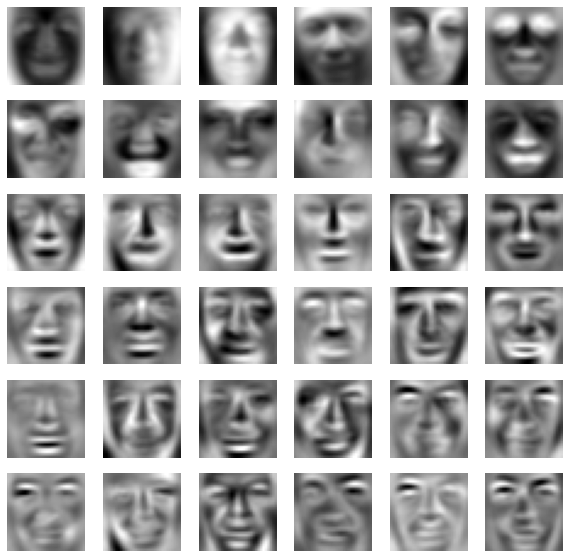

In [304]:
X_norm2 = feature_normalization(X4)[0]

U2 = PCA(X_norm2)[0]

U2_reduced = U2[:, :36].T #top 36 principal components

fig2, ax2 = plt.subplots(6,6,figsize=(10,10))
for i in range(0,36,6):
    for j in range(6):
        ax2[int(i/6),j].imshow(U2_reduced[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax2[int(i/6),j].axis("off")

In [305]:
K2 = 100
Z2 = project_data(X_norm2, U2, K2)

# Reconstructing Faces

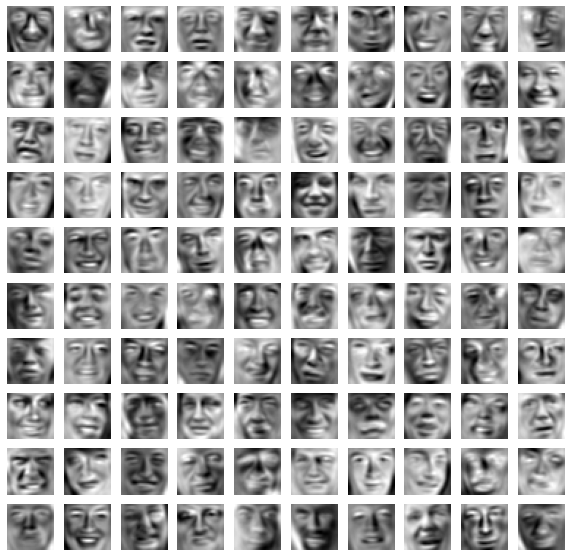

In [306]:
X3_recovered = reconstruct_data(Z2, U2, K2)

fig, ax = plt.subplots(10, 10, figsize = (10, 10))

for i in range(0, 100, 10):
    for j in range(10):
        ax[int(i/10),j].imshow(X3_recovered[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax[int(i/10),j].axis("off")

# PCA For Visualization

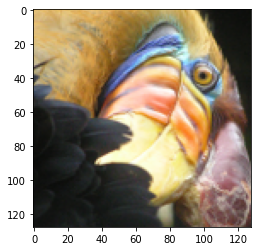

In [307]:
plt.imshow(img)
plt.show()

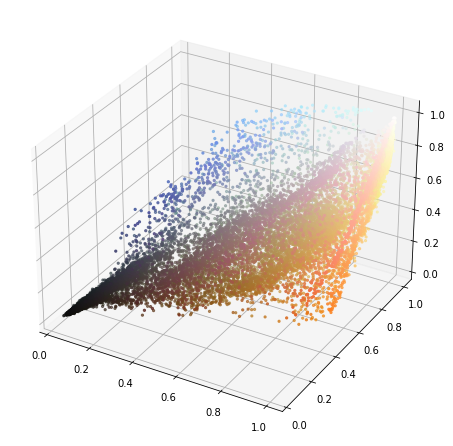

In [308]:
from mpl_toolkits.mplot3d import Axes3D

X_img = np.reshape(A, [A.shape[0] * A.shape[1], 3])

fig = plt.figure(figsize=(8,6))

ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

ax.scatter(X_img[:, 0], X_img[:, 1], X_img[:, 2], marker='.', c = X_img)
plt.show()

In [309]:
X_norm_img, mu_img, sigma_img = feature_normalization(X_img)

[U, S] = PCA(X_norm_img)[:2]
Z = project_data(X_norm_img, U, 2)

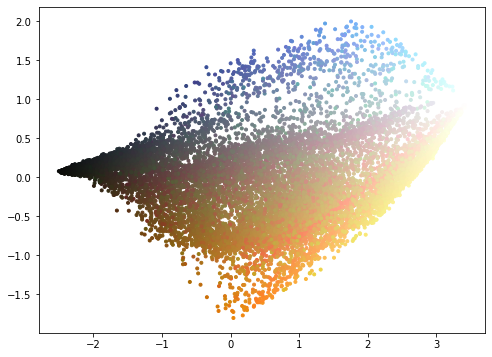

In [310]:
plt.figure(figsize=(8,6))
plt.scatter(-1*Z[:, 0], -1*Z[:, 1], marker='.', c=X_img)
# -1's to flip the eigenvectors, makes it easier to compare to the 3D plot
plt.show()